（一）数据获取

In [31]:
import jqdatasdk
jqdatasdk.auth('18811386107', 'PClkjh123456')
factors_list=jqdatasdk.get_all_factors()
factors_list

,factor,factor_intro,category,category_intro
0,administration_expense_ttm,管理费用TTM,basics,基础科目及衍生类因子
1,asset_impairment_loss_ttm,资产减值损失TTM,basics,基础科目及衍生类因子
2,cash_flow_to_price_ratio,现金流市值比,basics,基础科目及衍生类因子
3,circulating_market_cap,流通市值,basics,基础科目及衍生类因子
4,EBIT,息税前利润,basics,基础科目及衍生类因子
...,...,...,...,...
255,MAC5,5日移动均线,technical,技术指标因子
256,MAC60,60日移动均线,technical,技术指标因子
257,MACDC,平滑异同移动平均线,technical,技术指标因子
258,MFI14,资金流量指标,technical,技术指标因子


In [105]:
factors_list=['net_debt','VEMA5','VEMA26','debt_to_assets','EMAC120','EMA5','book_to_price_ratio','size','growth','beta','momentum','MAC5','MAC120']

In [106]:
pd=get_all_securities(types=['stock'], date=None)
pd

,display_name,name,start_date,end_date,type
000001.XSHE,平安银行,PAYH,1991-04-03,2200-01-01,stock
000002.XSHE,万科A,WKA,1991-01-29,2200-01-01,stock
000004.XSHE,ST国华,STGH,1990-12-01,2200-01-01,stock
000005.XSHE,ST星源,STXY,1990-12-10,2200-01-01,stock
000006.XSHE,深振业A,SZYA,1992-04-27,2200-01-01,stock
...,...,...,...,...,...
688799.XSHG,华纳药厂,HNYC,2021-07-13,2200-01-01,stock
688800.XSHG,瑞可达,RKD,2021-07-22,2200-01-01,stock
688819.XSHG,天能股份,TNGF,2021-01-18,2200-01-01,stock
688981.XSHG,中芯国际,ZXGJ,2020-07-16,2200-01-01,stock


In [116]:
d1=jqdatasdk.get_price('603986.XSHG', start_date='2017-05-06', end_date='2022-05-06', frequency='daily', fields=None, skip_paused=False, fq='pre', panel=True)
d1.index

C:\Users\DELL\anaconda3\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


DatetimeIndex(['2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11',
               '2017-05-12', '2017-05-15', '2017-05-16', '2017-05-17',
               '2017-05-18', '2017-05-19',
               ...
               '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-25',
               '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
               '2022-05-05', '2022-05-06'],
              dtype='datetime64[ns]', length=1215, freq=None)

In [130]:
import numpy as np,pandas as pd
df=pd.DataFrame()
for i in factors_list:
    data=jqdatasdk.get_factor_values(
    securities='600000.XSHG',
    factors=i,
    start_date='2017-05-06',
    end_date='2022-05-06')
    data=np.array(list(data.values()))
    d=list(data[0,:,0])
    df[i]=d
df.index=d1.index
df['stock_code']='600000.XSHG'
df   

,net_debt,VEMA5,VEMA26,debt_to_assets,EMAC120,EMA5,book_to_price_ratio,size,growth,beta,momentum,MAC5,MAC120,stock_code
2017-05-08,5.360259e+12,3.303641e+06,2.529913e+06,0.934465,1.078371,1.006817,1.798656,1.185397,0.154027,-1.234032,-0.077985,1.009123,1.098069,600000.XSHG
2017-05-09,5.360259e+12,2.884328e+06,2.494045e+06,0.934465,1.084735,1.009509,1.797925,1.194864,0.154498,-1.238216,-0.079929,1.010991,1.105023,600000.XSHG
2017-05-10,5.360259e+12,2.928752e+06,2.532827e+06,0.934465,1.094033,1.013299,1.796608,1.182904,0.151232,-1.203526,-0.085852,1.014741,1.114968,600000.XSHG
2017-05-11,5.360259e+12,2.921250e+06,2.560488e+06,0.934465,1.081833,1.002520,1.802597,1.172766,0.152181,-1.196008,-0.098102,1.001622,1.102883,600000.XSHG
2017-05-12,5.360259e+12,3.569598e+06,2.731288e+06,0.934465,1.048879,0.981916,1.793379,1.163653,0.150869,-1.146725,-0.094155,0.975699,1.069340,600000.XSHG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,7.102886e+12,2.613059e+06,2.177368e+06,0.915993,1.073462,1.010862,2.717079,0.917164,-0.515747,-1.857665,-0.421772,1.013538,1.073265,600000.XSHG
2022-04-28,7.563470e+12,2.810983e+06,2.253625e+06,0.916347,1.051107,0.993747,2.727166,0.903018,-0.485820,-1.844839,-0.365742,0.991239,1.051012,600000.XSHG
2022-04-29,7.563470e+12,2.927260e+06,2.320750e+06,0.916347,1.045113,0.992531,2.700036,0.914330,-0.530054,-1.913852,-0.366103,0.984807,1.045247,600000.XSHG
2022-05-05,7.563470e+12,2.640860e+06,2.302032e+06,0.916347,1.049513,0.998333,2.654081,0.923653,-0.632104,-1.943735,-0.383453,0.993992,1.049917,600000.XSHG


In [134]:
import numpy as np,pandas as pd
stock_data=pd.DataFrame()
for j in stocks:
    df=pd.DataFrame()
    for i in factors_list:
        data=jqdatasdk.get_factor_values(
        securities=j,
        factors=i,
        start_date='2017-05-06',
        end_date='2022-05-06')
        data=np.array(list(data.values()))
        d=list(data[0,:,0])
        df[i]=d
    df.index=d1.index
    df['stock_code']=j
    stock_data=stock_data.append(df)
stock_data

,net_debt,VEMA5,VEMA26,debt_to_assets,EMAC120,EMA5,book_to_price_ratio,size,growth,beta,momentum,MAC5,MAC120,stock_code
2017-05-08,5.360259e+12,3.303641e+06,2.529913e+06,0.934465,1.078371,1.006817,1.798656,1.185397,0.154027,-1.234032,-0.077985,1.009123,1.098069,600000.XSHG
2017-05-09,5.360259e+12,2.884328e+06,2.494045e+06,0.934465,1.084735,1.009509,1.797925,1.194864,0.154498,-1.238216,-0.079929,1.010991,1.105023,600000.XSHG
2017-05-10,5.360259e+12,2.928752e+06,2.532827e+06,0.934465,1.094033,1.013299,1.796608,1.182904,0.151232,-1.203526,-0.085852,1.014741,1.114968,600000.XSHG
2017-05-11,5.360259e+12,2.921250e+06,2.560488e+06,0.934465,1.081833,1.002520,1.802597,1.172766,0.152181,-1.196008,-0.098102,1.001622,1.102883,600000.XSHG
2017-05-12,5.360259e+12,3.569598e+06,2.731288e+06,0.934465,1.048879,0.981916,1.793379,1.163653,0.150869,-1.146725,-0.094155,0.975699,1.069340,600000.XSHG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,-4.547849e+09,1.902895e+06,1.859752e+06,0.130359,1.197721,0.998885,-1.312936,0.729439,-1.224873,1.439302,0.020656,1.002688,1.237855,603986.XSHG
2022-04-28,-5.316578e+09,2.167021e+06,1.921643e+06,0.095052,1.258436,1.035430,-1.261586,0.661125,-1.198403,1.431825,-0.030034,1.033266,1.301401,603986.XSHG
2022-04-29,-5.316578e+09,2.231323e+06,1.954108e+06,0.095052,1.192188,0.989053,-1.273941,0.688646,0.035819,1.466256,-0.182159,0.973207,1.233081,603986.XSHG
2022-05-05,-5.316578e+09,2.051008e+06,1.934573e+06,0.095052,1.187510,0.991858,-1.284961,0.687589,0.043367,1.468769,-0.129138,0.975114,1.228580,603986.XSHG


In [136]:
stock_data.to_csv('stock_data.csv', sep=',', header=True, index=True)

（二）因子筛选


（1）查看因子相关性

<AxesSubplot:>

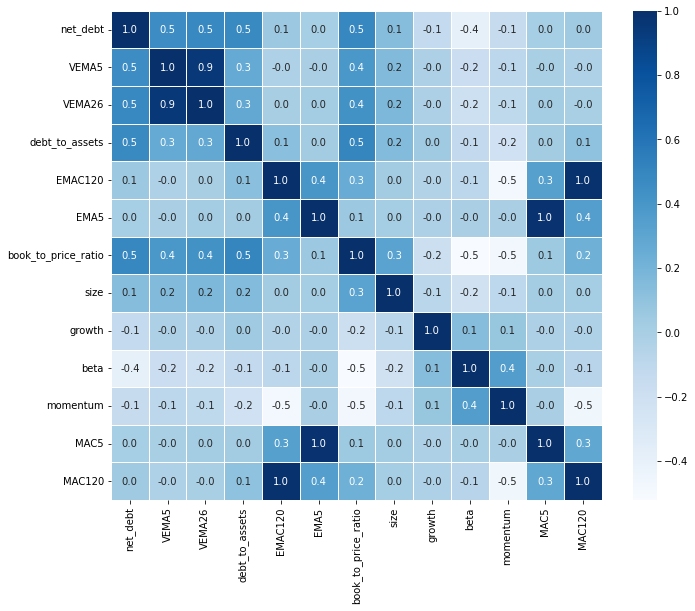

In [7]:
import seaborn as sns,matplotlib.pyplot as plt,pandas as pd
f,ax = plt.subplots(figsize=(11, 9))
stock_data=pd.read_csv('stock_data.csv')
sns.heatmap(stock_data.corr(), annot=True,  cmap=plt.get_cmap('Blues'),linewidths=.5, fmt= '.1f',ax=ax)

从图像可以看出，VEMA5与VEMA26相关性较高，MAC5与EMA5相关性较高，MAC120与EMAC120相关性较高。
故三对因子中各去除一个

In [6]:
import pandas as pd
stock_data=pd.read_csv('stock_data.csv')
drop_list=['VEMA26','EMA5','EMAC120']
stock_data=stock_data.drop(drop_list,axis=1)
stock_data.head()

,Unnamed: 0,net_debt,VEMA5,debt_to_assets,book_to_price_ratio,size,growth,beta,momentum,MAC5,MAC120,stock_code
0,2017/5/8,5.360260e+12,3303641.390,0.934465,1.798656,1.185397,0.154027,-1.234032,-0.077985,1.009123,1.098069,600000.XSHG
1,2017/5/9,5.360260e+12,2884327.593,0.934465,1.797925,1.194864,0.154498,-1.238216,-0.079929,1.010991,1.105023,600000.XSHG
2,2017/5/10,5.360260e+12,2928752.062,0.934465,1.796608,1.182904,0.151232,-1.203526,-0.085852,1.014741,1.114968,600000.XSHG
3,2017/5/11,5.360260e+12,2921250.375,0.934465,1.802597,1.172766,0.152181,-1.196008,-0.098102,1.001622,1.102883,600000.XSHG
4,2017/5/12,5.360260e+12,3569597.917,0.934465,1.793379,1.163653,0.150869,-1.146725,-0.094155,0.975699,1.069340,600000.XSHG


<AxesSubplot:>

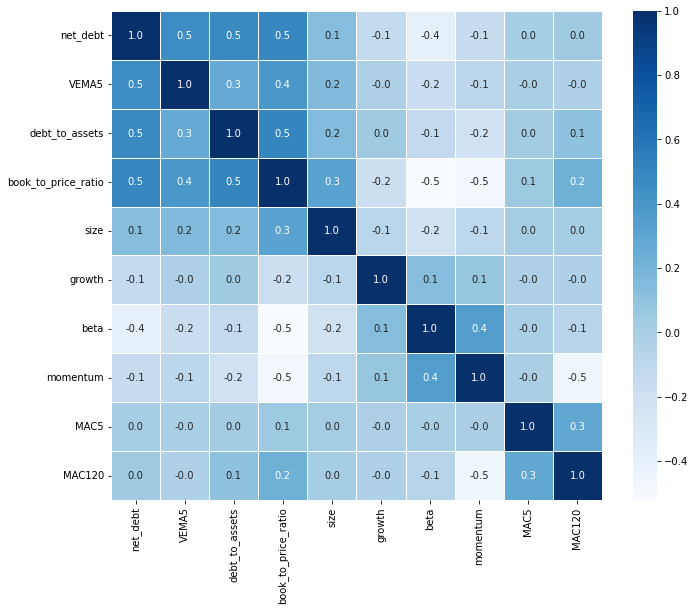

In [7]:
import seaborn as sns,matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(11, 9))
sns.heatmap(stock_data.corr(), annot=True,  cmap=plt.get_cmap('Blues'),linewidths=.5, fmt= '.1f',ax=ax)

（2）随机森林筛选特征

In [3]:
import jqdatasdk
jqdatasdk.auth('18811386107', 'PClkjh123456')
stocks =jqdatasdk.get_index_stocks('000050.XSHG')
stocks

auth success 


['600000.XSHG',
 '600028.XSHG',
 '600030.XSHG',
 '600031.XSHG',
 '600036.XSHG',
 '600048.XSHG',
 '600050.XSHG',
 '600104.XSHG',
 '600196.XSHG',
 '600276.XSHG',
 '600309.XSHG',
 '600436.XSHG',
 '600438.XSHG',
 '600519.XSHG',
 '600547.XSHG',
 '600570.XSHG',
 '600585.XSHG',
 '600588.XSHG',
 '600690.XSHG',
 '600745.XSHG',
 '600809.XSHG',
 '600837.XSHG',
 '600887.XSHG',
 '600893.XSHG',
 '600900.XSHG',
 '601012.XSHG',
 '601066.XSHG',
 '601088.XSHG',
 '601138.XSHG',
 '601166.XSHG',
 '601211.XSHG',
 '601288.XSHG',
 '601318.XSHG',
 '601336.XSHG',
 '601398.XSHG',
 '601601.XSHG',
 '601628.XSHG',
 '601633.XSHG',
 '601668.XSHG',
 '601688.XSHG',
 '601728.XSHG',
 '601857.XSHG',
 '601888.XSHG',
 '601899.XSHG',
 '601919.XSHG',
 '601995.XSHG',
 '603259.XSHG',
 '603288.XSHG',
 '603501.XSHG',
 '603986.XSHG']

In [4]:
import pandas as pd,numpy as np
df=pd.DataFrame()
for j in stocks:
    data=jqdatasdk.get_price(j, start_date='2017-05-06', end_date='2022-05-06', frequency='daily', fields='close', skip_paused=False, fq='pre',panel=True)
    data['daily_return']=data.pct_change().fillna(0)
    df=df.append(data)
df=df.drop('close',axis=1)
df

C:\Users\DELL\anaconda3\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


,daily_return
2017-05-08,0.000000
2017-05-09,-0.007157
2017-05-10,-0.010299
2017-05-11,0.010406
2017-05-12,0.030896
...,...
2022-04-27,0.077958
2022-04-28,-0.051520
2022-04-29,0.052716
2022-05-05,0.001282


In [12]:
daily_return=np.array(df['daily_return'].values.tolist())
daily_return

array([ 0.        , -0.00715746, -0.01029866, ...,  0.05271592,
        0.00128195, -0.04537089])

In [13]:
import pandas as pd
stock_data=pd.read_csv('stock_data.csv')
drop_list=['VEMA26','EMA5','EMAC120','Unnamed: 0','stock_code']
stock_data=stock_data.drop(drop_list,axis=1)
stock_data.index=df.index
stock_data

,net_debt,VEMA5,debt_to_assets,book_to_price_ratio,size,growth,beta,momentum,MAC5,MAC120
2017-05-08,5.360260e+12,3303641.390,0.934465,1.798656,1.185397,0.154027,-1.234032,-0.077985,1.009123,1.098069
2017-05-09,5.360260e+12,2884327.593,0.934465,1.797925,1.194864,0.154498,-1.238216,-0.079929,1.010991,1.105023
2017-05-10,5.360260e+12,2928752.062,0.934465,1.796608,1.182904,0.151232,-1.203526,-0.085852,1.014741,1.114968
2017-05-11,5.360260e+12,2921250.375,0.934465,1.802597,1.172766,0.152181,-1.196008,-0.098102,1.001622,1.102883
2017-05-12,5.360260e+12,3569597.917,0.934465,1.793379,1.163653,0.150869,-1.146725,-0.094155,0.975699,1.069340
...,...,...,...,...,...,...,...,...,...,...
2022-04-27,-4.547849e+09,1902894.715,0.130359,-1.312936,0.729439,-1.224873,1.439302,0.020656,1.002688,1.237855
2022-04-28,-5.316578e+09,2167020.810,0.095052,-1.261586,0.661125,-1.198403,1.431825,-0.030034,1.033266,1.301401
2022-04-29,-5.316578e+09,2231323.207,0.095052,-1.273941,0.688646,0.035819,1.466256,-0.182159,0.973207,1.233081
2022-05-05,-5.316578e+09,2051007.804,0.095052,-1.284961,0.687589,0.043367,1.468769,-0.129138,0.975114,1.228580


缺失值处理


In [14]:
stock_data.isnull().any().any()

True

In [15]:
stock_data=stock_data.fillna(0)
stock_data.isnull().any().any()

False

In [17]:
np.array(stock_data)

array([[ 5.36026000e+12,  3.30364139e+06,  9.34465000e-01, ...,
        -7.79850000e-02,  1.00912300e+00,  1.09806900e+00],
       [ 5.36026000e+12,  2.88432759e+06,  9.34465000e-01, ...,
        -7.99290000e-02,  1.01099100e+00,  1.10502300e+00],
       [ 5.36026000e+12,  2.92875206e+06,  9.34465000e-01, ...,
        -8.58520000e-02,  1.01474100e+00,  1.11496800e+00],
       ...,
       [-5.31657818e+09,  2.23132321e+06,  9.50520000e-02, ...,
        -1.82159000e-01,  9.73207000e-01,  1.23308100e+00],
       [-5.31657818e+09,  2.05100780e+06,  9.50520000e-02, ...,
        -1.29138000e-01,  9.75114000e-01,  1.22858000e+00],
       [-5.31657818e+09,  1.79813720e+06,  9.50520000e-02, ...,
        -2.32001000e-01,  1.02705800e+00,  1.28363900e+00]])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
x_train, x_test, y_train, y_test = train_test_split(stock_data,daily_return, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators =100,min_samples_leaf=5)      
rfecv = RFECV(estimator=clf, step=1,cv=5,scoring='accuracy')  
rf= rfecv.fit(x_train, y_train.astype('int'))
print('Optimal number of features :', rf.n_features_)
print('Best features :', x_train.columns[rf.support_])

Optimal number of features : 1
Best features : Index(['MAC120'], dtype='object')


In [26]:
factors_list=['liquidity','sharpe_ratio_20','roa_ttm','quick_ratio','MLEV','GMI','cash_to_current_liability','ACCA','single_day_VPT','BIAS10','BBIC']

In [29]:
import jqdatasdk
jqdatasdk.auth('18811386107', 'PClkjh123456')
d1=jqdatasdk.get_price('603986.XSHG', start_date='2017-05-06', end_date='2022-05-06', frequency='daily', fields=None, skip_paused=False, fq='pre', panel=True)
d1.index

C:\Users\DELL\anaconda3\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


DatetimeIndex(['2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11',
               '2017-05-12', '2017-05-15', '2017-05-16', '2017-05-17',
               '2017-05-18', '2017-05-19',
               ...
               '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-25',
               '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
               '2022-05-05', '2022-05-06'],
              dtype='datetime64[ns]', length=1215, freq=None)

In [33]:
import numpy as np,pandas as pd
stock_data=pd.DataFrame()
for j in stocks:
    df=pd.DataFrame()
    for i in factors_list:
        data=jqdatasdk.get_factor_values(
        securities=j,
        factors=i,
        start_date='2017-05-06',
        end_date='2022-05-06')
        data=np.array(list(data.values()))
        d=list(data[0,:,0])
        df[i]=d
    df.index=d1.index
    df['stock_code']=j
    stock_data=stock_data.append(df)
stock_data

,liquidity,sharpe_ratio_20,roa_ttm,quick_ratio,MLEV,GMI,cash_to_current_liability,ACCA,single_day_VPT,BIAS10,BBIC,stock_code
2017-05-08,-0.791590,-5.747721,0.009218,NaN,0.000000,NaN,NaN,-0.036616,-2064.770053,-1.245473,1.015998,600000.XSHG
2017-05-09,-0.817750,-5.720025,0.009218,NaN,0.000000,NaN,NaN,-0.036616,-1828.758497,-1.795983,1.019660,600000.XSHG
2017-05-10,-0.827541,-5.817354,0.009218,NaN,0.000000,NaN,NaN,-0.036616,-3735.927027,-2.484472,1.024833,600000.XSHG
2017-05-11,-0.846744,-5.059783,0.009218,NaN,0.000000,NaN,NaN,-0.036616,3634.073703,-1.315789,1.011890,600000.XSHG
2017-05-12,-0.842516,-2.241047,0.009218,NaN,0.000000,NaN,NaN,-0.036616,18621.769369,1.706970,0.984521,600000.XSHG
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,1.074871,-1.382414,0.126993,5.465675,0.004217,1.084031,5.216915,0.000897,9968.011038,-3.716541,1.025762,603986.XSHG
2022-04-28,1.078710,-1.381964,0.171810,7.542089,0.004203,1.084031,4.680714,-0.043941,-7723.878400,-7.822206,1.068153,603986.XSHG
2022-04-29,1.068820,-1.304333,0.171810,7.542089,0.003994,0.803127,4.680714,-0.043941,6919.861252,-2.386948,1.015714,603986.XSHG
2022-05-05,1.058341,-1.195184,0.171810,7.542089,0.003989,0.803127,4.680714,-0.043941,120.533932,-1.114900,1.009439,603986.XSHG


<AxesSubplot:>

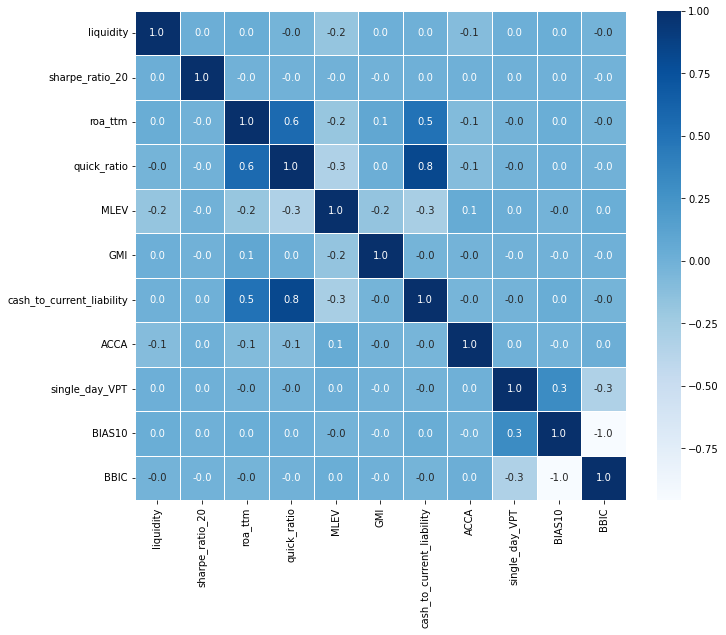

In [34]:
import seaborn as sns,matplotlib.pyplot as plt,pandas as pd
f,ax = plt.subplots(figsize=(11, 9))
sns.heatmap(stock_data.corr(), annot=True,  cmap=plt.get_cmap('Blues'),linewidths=.5, fmt= '.1f',ax=ax)

In [35]:
import pandas as pd,numpy as np
df=pd.DataFrame()
for j in stocks:
    data=jqdatasdk.get_price(j, start_date='2017-05-06', end_date='2022-05-06', frequency='daily', fields='close', skip_paused=False, fq='pre',panel=True)
    data['daily_return']=data.pct_change().fillna(0)
    df=df.append(data)
df=df.drop('close',axis=1)
df

C:\Users\DELL\anaconda3\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


,daily_return
2017-05-08,0.000000
2017-05-09,-0.007157
2017-05-10,-0.010299
2017-05-11,0.010406
2017-05-12,0.030896
...,...
2022-04-27,0.077958
2022-04-28,-0.051520
2022-04-29,0.052716
2022-05-05,0.001282


In [36]:
daily_return=np.array(df['daily_return'].values.tolist())

In [37]:
import pandas as pd
stock_data=stock_data.drop('stock_code',axis=1)
stock_data.index=df.index
stock_data

,liquidity,sharpe_ratio_20,roa_ttm,quick_ratio,MLEV,GMI,cash_to_current_liability,ACCA,single_day_VPT,BIAS10,BBIC
2017-05-08,-0.791590,-5.747721,0.009218,NaN,0.000000,NaN,NaN,-0.036616,-2064.770053,-1.245473,1.015998
2017-05-09,-0.817750,-5.720025,0.009218,NaN,0.000000,NaN,NaN,-0.036616,-1828.758497,-1.795983,1.019660
2017-05-10,-0.827541,-5.817354,0.009218,NaN,0.000000,NaN,NaN,-0.036616,-3735.927027,-2.484472,1.024833
2017-05-11,-0.846744,-5.059783,0.009218,NaN,0.000000,NaN,NaN,-0.036616,3634.073703,-1.315789,1.011890
2017-05-12,-0.842516,-2.241047,0.009218,NaN,0.000000,NaN,NaN,-0.036616,18621.769369,1.706970,0.984521
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,1.074871,-1.382414,0.126993,5.465675,0.004217,1.084031,5.216915,0.000897,9968.011038,-3.716541,1.025762
2022-04-28,1.078710,-1.381964,0.171810,7.542089,0.004203,1.084031,4.680714,-0.043941,-7723.878400,-7.822206,1.068153
2022-04-29,1.068820,-1.304333,0.171810,7.542089,0.003994,0.803127,4.680714,-0.043941,6919.861252,-2.386948,1.015714
2022-05-05,1.058341,-1.195184,0.171810,7.542089,0.003989,0.803127,4.680714,-0.043941,120.533932,-1.114900,1.009439


In [38]:
stock_data.isnull().any().any()

True

In [39]:
stock_data=stock_data.fillna(0)
stock_data.isnull().any().any()

False

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
x_train, x_test, y_train, y_test = train_test_split(stock_data,daily_return, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators =100,min_samples_leaf=5)      
rfecv = RFECV(estimator=clf, step=1,cv=5,scoring='accuracy')  
rf= rfecv.fit(x_train, y_train.astype('int'))
print('Optimal number of features :', rf.n_features_)
print('Best features :', x_train.columns[rf.support_])

Optimal number of features : 1
Best features : Index(['BBIC'], dtype='object')


In [42]:
factors_list=['bull_power','CCI20','cube_of_size','earnings_growth','raw_beta','boll_down','boll_up','MFI14','Kurtosis60','SGI','quick_ratio']

In [43]:
import jqdatasdk
jqdatasdk.auth('18811386107', 'PClkjh123456')
d1=jqdatasdk.get_price('603986.XSHG', start_date='2017-05-06', end_date='2022-05-06', frequency='daily', fields=None, skip_paused=False, fq='pre', panel=True)
d1.index

C:\Users\DELL\anaconda3\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


DatetimeIndex(['2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11',
               '2017-05-12', '2017-05-15', '2017-05-16', '2017-05-17',
               '2017-05-18', '2017-05-19',
               ...
               '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-25',
               '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
               '2022-05-05', '2022-05-06'],
              dtype='datetime64[ns]', length=1215, freq=None)

In [55]:
import numpy as np,pandas as pd
stock_data=pd.DataFrame()
for j in stocks:
    df=pd.DataFrame()
    for i in factors_list:
        data=jqdatasdk.get_factor_values(
        securities=j,
        factors=i,
        start_date='2017-05-06',
        end_date='2022-05-06')
        data=np.array(list(data.values()))
        d=list(data[0,:,0])
        df[i]=d
    df.index=d1.index
    stock_data=stock_data.append(df)
stock_data

,bull_power,CCI20,cube_of_size,earnings_growth,raw_beta,boll_down,boll_up,MFI14,Kurtosis60,SGI,quick_ratio
2017-05-08,-0.015069,-109.211776,-8.709430,0.069897,0.265349,0.979462,1.075726,34.308188,0.069945,1.097182,NaN
2017-05-09,-0.015681,-110.501989,-8.656458,0.069897,0.259832,0.985374,1.076427,34.815235,0.100013,1.097182,NaN
2017-05-10,-0.010666,-128.993370,-8.680877,0.069897,0.273169,0.992764,1.080939,34.478735,0.099543,1.097182,NaN
2017-05-11,-0.012127,-116.651556,-8.798553,0.069897,0.274100,0.984459,1.061036,45.143318,0.001057,1.097182,NaN
2017-05-12,0.014875,2.298851,-8.836206,0.069897,0.297579,0.959242,1.021877,49.121890,3.201417,1.097182,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,-0.034220,-131.028216,-10.091557,-0.020570,1.354647,0.935154,1.180286,41.733864,0.448102,1.404000,5.465675
2022-04-28,-0.033765,-130.124797,-9.894273,-0.020570,1.350326,0.972346,1.238341,34.626351,0.428624,1.404000,7.542089
2022-04-29,-0.006624,-74.745707,-9.974772,0.163761,1.365028,0.927676,1.154858,43.365755,0.224111,1.892467,7.542089
2022-05-05,0.006087,-47.474994,-10.088015,0.163761,1.362977,0.926831,1.140185,49.682242,0.236983,1.892467,7.542089


<AxesSubplot:>

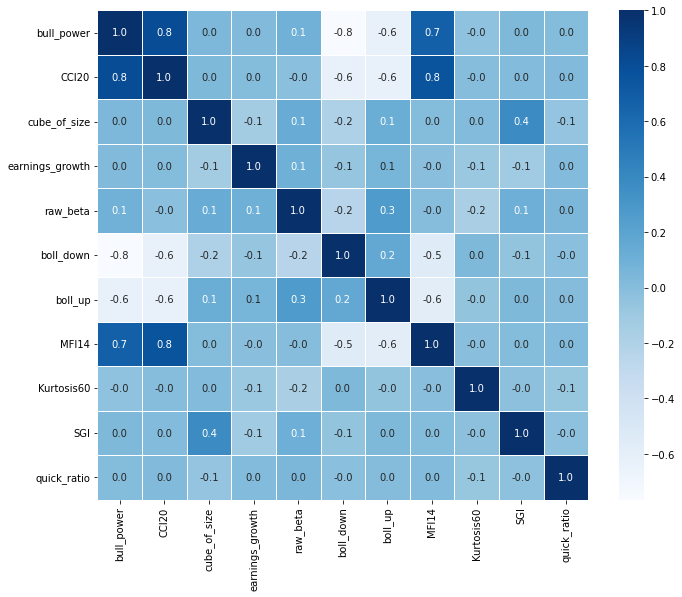

In [50]:
import seaborn as sns,matplotlib.pyplot as plt,pandas as pd
f,ax = plt.subplots(figsize=(11, 9))
sns.heatmap(stock_data.corr(), annot=True,  cmap=plt.get_cmap('Blues'),linewidths=.5, fmt= '.1f',ax=ax)

In [51]:
import pandas as pd,numpy as np
df=pd.DataFrame()
for j in stocks:
    data=jqdatasdk.get_price(j, start_date='2017-05-06', end_date='2022-05-06', frequency='daily', fields='close', skip_paused=False, fq='pre',panel=True)
    data['daily_return']=data.pct_change().fillna(0)
    df=df.append(data)
df=df.drop('close',axis=1)
df

C:\Users\DELL\anaconda3\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


,daily_return
2017-05-08,0.000000
2017-05-09,-0.007157
2017-05-10,-0.010299
2017-05-11,0.010406
2017-05-12,0.030896
...,...
2022-04-27,0.077958
2022-04-28,-0.051520
2022-04-29,0.052716
2022-05-05,0.001282


In [52]:
daily_return=np.array(df['daily_return'].values.tolist())

In [56]:
stock_data.isnull().any().any()
stock_data=stock_data.fillna(0)
stock_data.isnull().any().any()

False

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
x_train, x_test, y_train, y_test = train_test_split(stock_data,daily_return, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators =100,min_samples_leaf=5)      
rfecv = RFECV(estimator=clf, step=1,cv=5,scoring='accuracy')  
rf= rfecv.fit(x_train, y_train.astype('int'))
print('Optimal number of features :', rf.n_features_)
print('Best features :', x_train.columns[rf.support_])

Optimal number of features : 1
Best features : Index(['quick_ratio'], dtype='object')


In [1]:
factors_list=['circulating_market_cap','EBIT','financial_expense_ttm','net_working_capital','ATR6','MAWVAD','money_flow_20','VDEA','TVMA20','TVSTD20']

In [16]:
import jqdatasdk
jqdatasdk.auth('18811386107', 'PClkjh123456')
d1=jqdatasdk.get_price('603986.XSHG', start_date='2017-05-06', end_date='2022-05-06', frequency='daily', fields=None, skip_paused=False, fq='pre', panel=True)
d1.index

C:\Users\DELL\anaconda3\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


DatetimeIndex(['2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11',
               '2017-05-12', '2017-05-15', '2017-05-16', '2017-05-17',
               '2017-05-18', '2017-05-19',
               ...
               '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-25',
               '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
               '2022-05-05', '2022-05-06'],
              dtype='datetime64[ns]', length=1215, freq=None)

In [6]:
stocks =jqdatasdk.get_index_stocks('000050.XSHG')
import numpy as np,pandas as pd
stock_data=pd.DataFrame()
for j in stocks:
    df=pd.DataFrame()
    for i in factors_list:
        data=jqdatasdk.get_factor_values(
        securities=j,
        factors=i,
        start_date='2017-05-06',
        end_date='2022-05-06')
        data=np.array(list(data.values()))
        d=list(data[0,:,0])
        df[i]=d
    df.index=d1.index
    stock_data=stock_data.append(df)
stock_data

,circulating_market_cap,EBIT,financial_expense_ttm,net_working_capital,ATR6,MAWVAD,money_flow_20,VDEA,TVMA20,TVSTD20
2017-05-08,3.212476e+11,1.901700e+10,NaN,NaN,2.178333,5.169753e+05,7.355468e+09,23053.376988,3.671845e+08,1.534138e+08
2017-05-09,3.190858e+11,1.901700e+10,NaN,NaN,2.271667,-3.428668e+05,7.380477e+09,45378.079900,3.684446e+08,1.525768e+08
2017-05-10,3.158431e+11,1.901700e+10,NaN,NaN,2.600000,-9.697763e+05,7.500651e+09,67446.962788,3.745856e+08,1.519517e+08
2017-05-11,3.188696e+11,1.901700e+10,NaN,NaN,2.805000,-9.446547e+05,7.549659e+09,86268.302029,3.769834e+08,1.519608e+08
2017-05-12,3.288140e+11,1.901700e+10,NaN,NaN,3.306667,2.555114e+05,7.868335e+09,133142.264386,3.928874e+08,1.670226e+08
...,...,...,...,...,...,...,...,...,...,...
2022-04-27,7.718257e+10,9.247419e+08,-6.239810e+07,8.650150e+09,42.078333,-5.144813e+05,2.683205e+10,-103884.489608,1.340882e+09,3.593279e+08
2022-04-28,7.320613e+10,7.317224e+08,-1.151183e+08,1.016336e+10,46.573333,-1.106110e+06,2.642080e+10,-78927.037335,1.320665e+09,3.174925e+08
2022-04-29,7.706525e+10,7.317224e+08,-1.151183e+08,1.016336e+10,49.708333,-1.702862e+06,2.643786e+10,-52611.652557,1.321480e+09,3.182612e+08
2022-05-05,7.716405e+10,7.317224e+08,-1.151183e+08,1.016336e+10,47.585000,-1.926714e+06,2.595677e+10,-37387.020507,1.297639e+09,3.093354e+08


<AxesSubplot:>

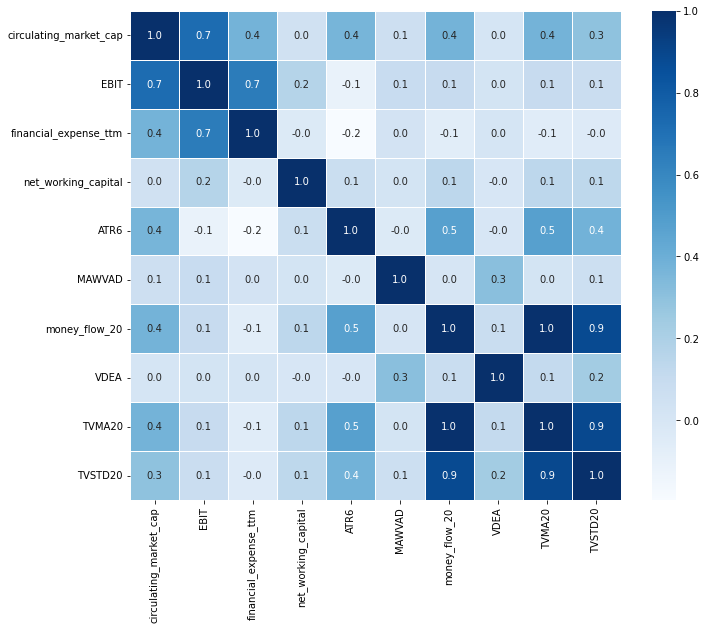

In [7]:
import seaborn as sns,matplotlib.pyplot as plt,pandas as pd
f,ax = plt.subplots(figsize=(11, 9))
sns.heatmap(stock_data.corr(), annot=True,  cmap=plt.get_cmap('Blues'),linewidths=.5, fmt= '.1f',ax=ax)

<AxesSubplot:>

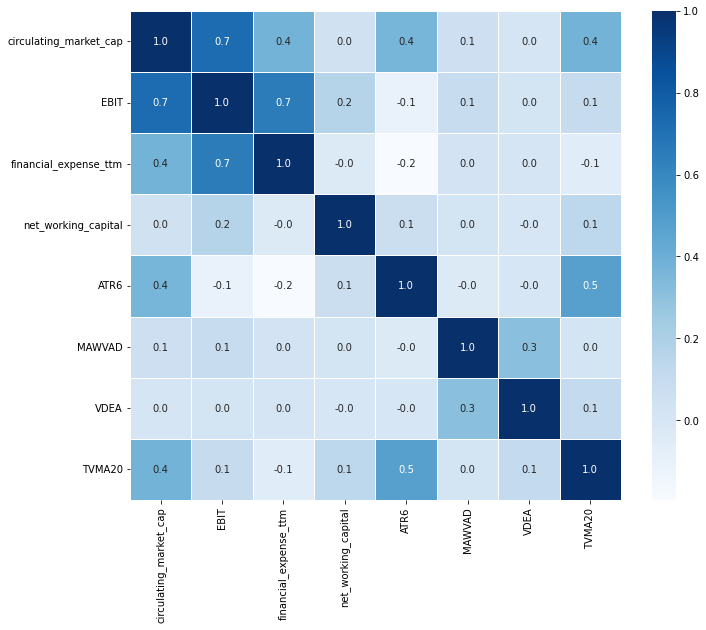

In [10]:
import seaborn as sns,matplotlib.pyplot as plt,pandas as pd
f,ax = plt.subplots(figsize=(11, 9))
stock_data=stock_data.drop(['TVSTD20'],axis=1)
sns.heatmap(stock_data.corr(), annot=True,  cmap=plt.get_cmap('Blues'),linewidths=.5, fmt= '.1f',ax=ax)

In [11]:
stock_data.isnull().any().any()
stock_data=stock_data.fillna(0)
stock_data.isnull().any().any()

False

In [12]:
import pandas as pd,numpy as np
df=pd.DataFrame()
for j in stocks:
    data=jqdatasdk.get_price(j, start_date='2017-05-06', end_date='2022-05-06', frequency='daily', fields='close', skip_paused=False, fq='pre',panel=True)
    data['daily_return']=data.pct_change().fillna(0)
    df=df.append(data)
df=df.drop('close',axis=1)
df

C:\Users\DELL\anaconda3\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


,daily_return
2017-05-08,0.000000
2017-05-09,-0.007157
2017-05-10,-0.010299
2017-05-11,0.010406
2017-05-12,0.030896
...,...
2022-04-27,0.077958
2022-04-28,-0.051520
2022-04-29,0.052716
2022-05-05,0.001282


In [13]:
daily_return=np.array(df['daily_return'].values.tolist())

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
x_train, x_test, y_train, y_test = train_test_split(stock_data,daily_return, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators =100,min_samples_leaf=5)      
rfecv = RFECV(estimator=clf, step=1,cv=5,scoring='accuracy')  
rf= rfecv.fit(x_train, y_train.astype('int'))
print('Optimal number of features :', rf.n_features_)
print('Best features :', x_train.columns[rf.support_])

Optimal number of features : 1
Best features : Index(['TVMA20'], dtype='object')


In [15]:
factors_list=['VOL60','VROC12','total_profit_growth_rate','bear_power','bull_power','CR20','MASS','PLRC12','ROC20','MLEV','maximum_margin','Skewness60','VMACD']

In [17]:
import jqdatasdk
jqdatasdk.auth('18811386107', 'PClkjh123456')
d1=jqdatasdk.get_price('603986.XSHG', start_date='2017-05-06', end_date='2022-05-06', frequency='daily', fields=None, skip_paused=False, fq='pre', panel=True)
d1.index

C:\Users\DELL\anaconda3\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


DatetimeIndex(['2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11',
               '2017-05-12', '2017-05-15', '2017-05-16', '2017-05-17',
               '2017-05-18', '2017-05-19',
               ...
               '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-25',
               '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
               '2022-05-05', '2022-05-06'],
              dtype='datetime64[ns]', length=1215, freq=None)

In [18]:
stocks =jqdatasdk.get_index_stocks('000050.XSHG')
import numpy as np,pandas as pd
stock_data=pd.DataFrame()
for j in stocks:
    df=pd.DataFrame()
    for i in factors_list:
        data=jqdatasdk.get_factor_values(
        securities=j,
        factors=i,
        start_date='2017-05-06',
        end_date='2022-05-06')
        data=np.array(list(data.values()))
        d=list(data[0,:,0])
        df[i]=d
    df.index=d1.index
    stock_data=stock_data.append(df)
stock_data

,VOL60,VROC12,total_profit_growth_rate,bear_power,bull_power,CR20,MASS,PLRC12,ROC20,MLEV,maximum_margin,Skewness60,VMACD
2017-05-08,0.097167,6.105905,0.000099,-0.041349,-0.015069,30.245747,25.282888,-0.000321,-7.679604,0.000000,NaN,0.227340,181759.928575
2017-05-09,0.097667,-15.262767,0.000099,-0.027937,-0.015681,33.918129,25.223625,-0.001433,-7.577019,0.000000,NaN,0.288440,89298.811646
2017-05-10,0.098667,60.878916,0.000099,-0.031205,-0.010666,37.204724,25.216511,-0.002440,-8.033473,0.000000,NaN,0.348938,88275.531552
2017-05-11,0.099167,110.489161,0.000099,-0.028430,-0.012127,37.992126,25.183663,-0.003033,-7.112971,0.000000,NaN,0.362788,75285.356964
2017-05-12,0.101667,206.116617,0.000099,-0.018006,0.014875,55.942623,25.410880,-0.002171,-3.459916,0.000000,NaN,1.165982,187495.849427
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,1.779722,36.670117,1.401083,-0.136623,-0.034220,43.435656,24.394278,-0.004802,-16.566547,0.004217,0.919619,0.489358,49818.139988
2022-04-28,1.770153,66.618736,1.687635,-0.101244,-0.033765,52.381474,24.573026,-0.008669,-16.430535,0.004203,0.948893,0.476443,99829.809094
2022-04-29,1.775220,0.621570,1.687635,-0.063997,-0.006624,59.742968,24.732013,-0.011502,-14.857767,0.003994,0.947590,0.455686,105261.539111
2022-05-05,1.770782,-21.098208,1.687635,-0.028641,0.006087,68.776525,24.922531,-0.011839,-11.387648,0.003989,0.948254,0.427774,60898.528200


<AxesSubplot:>

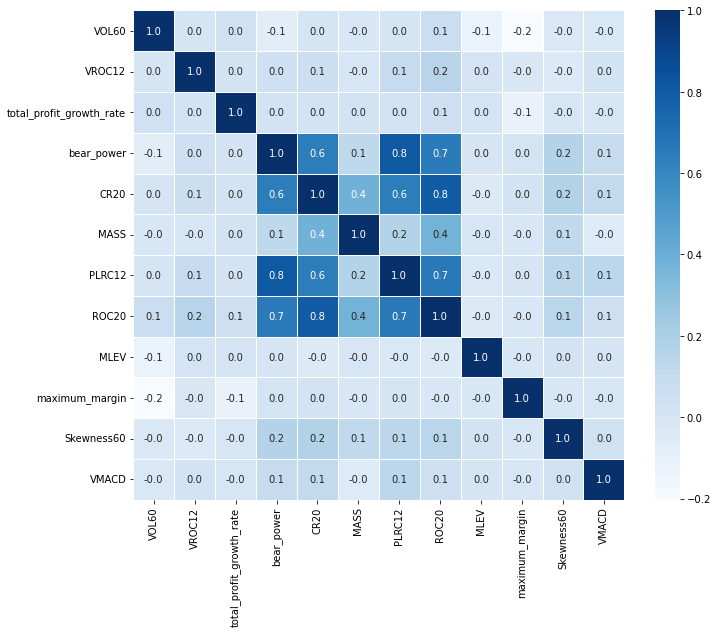

In [20]:
import seaborn as sns,matplotlib.pyplot as plt,pandas as pd
f,ax = plt.subplots(figsize=(11, 9))
stock_data=stock_data.drop('bull_power',axis=1)
sns.heatmap(stock_data.corr(), annot=True,  cmap=plt.get_cmap('Blues'),linewidths=.5, fmt= '.1f',ax=ax)

In [21]:
stock_data.isnull().any().any()
stock_data=stock_data.fillna(0)
stock_data.isnull().any().any()

False

In [22]:
import pandas as pd,numpy as np
df=pd.DataFrame()
for j in stocks:
    data=jqdatasdk.get_price(j, start_date='2017-05-06', end_date='2022-05-06', frequency='daily', fields='close', skip_paused=False, fq='pre',panel=True)
    data['daily_return']=data.pct_change().fillna(0)
    df=df.append(data)
df=df.drop('close',axis=1)
df

C:\Users\DELL\anaconda3\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


,daily_return
2017-05-08,0.000000
2017-05-09,-0.007157
2017-05-10,-0.010299
2017-05-11,0.010406
2017-05-12,0.030896
...,...
2022-04-27,0.077958
2022-04-28,-0.051520
2022-04-29,0.052716
2022-05-05,0.001282


In [23]:
daily_return=np.array(df['daily_return'].values.tolist())

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
x_train, x_test, y_train, y_test = train_test_split(stock_data,daily_return, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators =100,min_samples_leaf=5)      
rfecv = RFECV(estimator=clf, step=1,cv=5,scoring='accuracy')  
rf= rfecv.fit(x_train, y_train.astype('int'))
print('Optimal number of features :', rf.n_features_)
print('Best features :', x_train.columns[rf.support_])

Optimal number of features : 1
Best features : Index(['VMACD'], dtype='object')


因子筛选结果：<br>
MAC120(120日移动均线,技术指标因子),<br>
BBIC(BBI 动量,动量类因子),<br>
quick_ratio(速动比率,质量类因子),<br>
TVMA20(20日成交金额的移动平均值,情绪类因子),<br>
VMACD(成交量指数平滑异同移动平均线,情绪类因子)